In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Make Samples

In [2]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]).T
y = np.array([[0],[1],[1],[0]]).T
print(x.shape, y.shape)

(2, 4) (1, 4)


# 2. Weight and Bias

In [3]:
a,b = x.shape
w1 = np.random.rand(a,a)#*2-1
w2 = np.random.rand(a)#*2-1
w2 = np.array([w2])
b1 = np.random.rand(a)#*2-1
b2 = np.random.rand(1)#*2-1
print(w1,w1.shape)
print(w2,w2.shape)

[[ 0.79392113  0.81524376]
 [ 0.25198211  0.53270137]] (2, 2)
[[ 0.72002958  0.83932552]] (1, 2)


# 3. Training

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def loss(h,y):
    cost = 0
    for i in range(4):
        cost += (1/y.size)*(h-y)**2
    return cost

In [6]:
def predict(h):
    return np.round(h)

In [7]:
# hyperparameter
epoch = 100000
learning_rate = 0.3
scale = 1

cost_array = []

In [8]:
for i in range(epoch):
    # forward propagation
    z1 = np.dot(w1,x)+np.array([b1]*4).T
    h1 = sigmoid(scale*z1)
    z2 = np.dot(w2,h1)+b2
    h2 = sigmoid(scale*z2)
    
    # loss
    cost = loss(h2, y)
    cost_array.append(cost.sum())
    
    # backpropagation
    d1 = h2-y
    d2 = d1*h2*(1-h2)*scale
    dw2 = np.dot(d2,h1.T)
    
    d3 = np.dot(w2.T,d2)
    d4 = d3*h1*(1-h1)*scale
    dw1 = np.dot(d4,x.T)
    
    w2 = w2 - learning_rate*dw2/y.size
    w1 = w1 - learning_rate*dw1/y.size
    
    b2 = b2 - learning_rate*d2.mean(axis=1)
    b1 = b1 - learning_rate*d4.mean(axis=1)
    
    if (i%(epoch/10) == 0):
        print('epoch :',i,'loss :',cost.sum())#,'dw1 :',dw1,'dw2 :',dw2)
    if (i == epoch-1):
        print('epoch :',i,'loss :',cost.sum())#,'dw1 :',dw1,'dw2 :',dw2)

epoch : 0 loss : 1.32049319902
epoch : 10000 loss : 0.0211026057506
epoch : 20000 loss : 0.00571513734663
epoch : 30000 loss : 0.00320326677253
epoch : 40000 loss : 0.00220524843747
epoch : 50000 loss : 0.0016745090916
epoch : 60000 loss : 0.00134661196022
epoch : 70000 loss : 0.00112450383463
epoch : 80000 loss : 0.000964365820286
epoch : 90000 loss : 0.000843575345806
epoch : 99999 loss : 0.000749303091143


# 4. Result

In [9]:
h2

array([[ 0.01516666,  0.98698424,  0.98697853,  0.01342784]])

In [10]:
predict(h2)

array([[ 0.,  1.,  1.,  0.]])

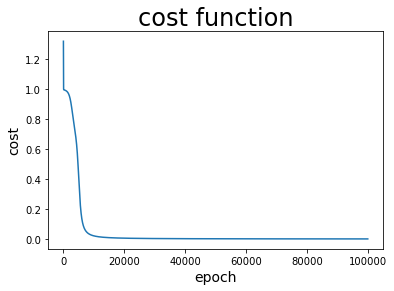

In [11]:
plt.plot(cost_array);
plt.title('cost function',fontsize =24);
plt.xlabel('epoch',fontsize=14);
plt.ylabel('cost',fontsize=14);